# Lab1-Assignment

Copyright: Vrije Universiteit Amsterdam, Faculty of Humanities, CLTL

This notebook describes the assignment for Lab 1 of the text mining course. 

**Points**: each exercise is prefixed with the number of points you can obtain for the exercise.

We assume you have worked through the following notebooks:
* **Lab1.1-introduction**
* **Lab1.2-introduction-to-NLTK**
* **Lab1.3-introduction-to-spaCy** 

In this assignment, you will process an English text (**Lab1-apple-samsung-example.txt**) with both NLTK and spaCy and discuss the similarities and differences.

## Credits
The notebooks in this block have been originally created by [Marten Postma](https://martenpostma.github.io). Adaptations were made by [Filip Ilievski](http://ilievski.nl).

## Tip: how to read a file from disk
Let's open the file **Lab1-apple-samsung-example.txt** from disk.

In [1]:
from pathlib import Path

In [2]:
cur_dir = Path().resolve() # this should provide you with the folder in which this notebook is placed
path_to_file = Path.joinpath(cur_dir, 'Lab1-apple-samsung-example.txt')
print(path_to_file)
print('does path exist? ->', Path.exists(path_to_file))

C:\Users\kevyn\Documents\GitHub\tm21\.assignments\lab1\Lab1-apple-samsung-example.txt
does path exist? -> True


If the output from the code cell above states that **does path exist? -> False**, please check that the file **Lab1-apple-samsung-example.txt** is in the same directory as this notebook.

In [3]:
with open(path_to_file) as infile:
    text = infile.read()

print('number of characters', len(text))

number of characters 1139


## [total points: 4] Exercise 1: NLTK
In this exercise, we use NLTK to apply **Part-of-speech (POS) tagging**, **Named Entity Recognition (NER)**, and **Constituency parsing**. The following code snippet already performs sentence splitting and tokenization. 

In [4]:
import nltk
from nltk.tokenize import sent_tokenize
from nltk import word_tokenize

In [5]:
sentences_nltk = sent_tokenize(text)

In [6]:
tokens_per_sentence = []
for sentence_nltk in sentences_nltk:
    sent_tokens = word_tokenize(sentence_nltk)
    tokens_per_sentence.append(sent_tokens)

We will use lists to keep track of the output of the NLP tasks. We can hence inspect the output for each task using the index of the sentence.

In [7]:
sent_id = 1
print('SENTENCE', sentences_nltk[sent_id])
print('TOKENS', tokens_per_sentence[sent_id])

SENTENCE The six phones and tablets affected are the Galaxy S III, running the new Jelly Bean system, the Galaxy Tab 8.9 Wifi tablet, the Galaxy Tab 2 10.1, Galaxy Rugby Pro and Galaxy S III mini.
TOKENS ['The', 'six', 'phones', 'and', 'tablets', 'affected', 'are', 'the', 'Galaxy', 'S', 'III', ',', 'running', 'the', 'new', 'Jelly', 'Bean', 'system', ',', 'the', 'Galaxy', 'Tab', '8.9', 'Wifi', 'tablet', ',', 'the', 'Galaxy', 'Tab', '2', '10.1', ',', 'Galaxy', 'Rugby', 'Pro', 'and', 'Galaxy', 'S', 'III', 'mini', '.']


### [point: 1] Exercise 1a: Part-of-speech (POS) tagging
Use `nltk.pos_tag` to perform part-of-speech tagging on each sentence.

Use `print` to **show** the output in the notebook (and hence also in the exported PDF!).

In [8]:
pos_tags_per_sentence = []
for tokens in tokens_per_sentence:
    pos_tags = nltk.pos_tag(tokens)
    pos_tags_per_sentence.append(pos_tags)
    print(pos_tags)

[('https', 'NN'), (':', ':'), ('//www.telegraph.co.uk/technology/apple/9702716/Apple-Samsung-lawsuit-six-more-products-under-scrutiny.html', 'JJ'), ('Documents', 'NNS'), ('filed', 'VBN'), ('to', 'TO'), ('the', 'DT'), ('San', 'NNP'), ('Jose', 'NNP'), ('federal', 'JJ'), ('court', 'NN'), ('in', 'IN'), ('California', 'NNP'), ('on', 'IN'), ('November', 'NNP'), ('23', 'CD'), ('list', 'NN'), ('six', 'CD'), ('Samsung', 'NNP'), ('products', 'NNS'), ('running', 'VBG'), ('the', 'DT'), ('``', '``'), ('Jelly', 'RB'), ('Bean', 'NNP'), ("''", "''"), ('and', 'CC'), ('``', '``'), ('Ice', 'NNP'), ('Cream', 'NNP'), ('Sandwich', 'NNP'), ("''", "''"), ('operating', 'VBG'), ('systems', 'NNS'), (',', ','), ('which', 'WDT'), ('Apple', 'NNP'), ('claims', 'VBZ'), ('infringe', 'VB'), ('its', 'PRP$'), ('patents', 'NNS'), ('.', '.')]
[('The', 'DT'), ('six', 'CD'), ('phones', 'NNS'), ('and', 'CC'), ('tablets', 'NNS'), ('affected', 'VBN'), ('are', 'VBP'), ('the', 'DT'), ('Galaxy', 'NNP'), ('S', 'NNP'), ('III', 'NNP'

In [9]:
print(pos_tags_per_sentence)

[[('https', 'NN'), (':', ':'), ('//www.telegraph.co.uk/technology/apple/9702716/Apple-Samsung-lawsuit-six-more-products-under-scrutiny.html', 'JJ'), ('Documents', 'NNS'), ('filed', 'VBN'), ('to', 'TO'), ('the', 'DT'), ('San', 'NNP'), ('Jose', 'NNP'), ('federal', 'JJ'), ('court', 'NN'), ('in', 'IN'), ('California', 'NNP'), ('on', 'IN'), ('November', 'NNP'), ('23', 'CD'), ('list', 'NN'), ('six', 'CD'), ('Samsung', 'NNP'), ('products', 'NNS'), ('running', 'VBG'), ('the', 'DT'), ('``', '``'), ('Jelly', 'RB'), ('Bean', 'NNP'), ("''", "''"), ('and', 'CC'), ('``', '``'), ('Ice', 'NNP'), ('Cream', 'NNP'), ('Sandwich', 'NNP'), ("''", "''"), ('operating', 'VBG'), ('systems', 'NNS'), (',', ','), ('which', 'WDT'), ('Apple', 'NNP'), ('claims', 'VBZ'), ('infringe', 'VB'), ('its', 'PRP$'), ('patents', 'NNS'), ('.', '.')], [('The', 'DT'), ('six', 'CD'), ('phones', 'NNS'), ('and', 'CC'), ('tablets', 'NNS'), ('affected', 'VBN'), ('are', 'VBP'), ('the', 'DT'), ('Galaxy', 'NNP'), ('S', 'NNP'), ('III', 'NN

### [point: 1] Exercise 1b: Named Entity Recognition (NER)
Use `nltk.chunk.ne_chunk` to perform Named Entity Recognition (NER) on each sentence.

Use `print` to **show** the output in the notebook (and hence also in the exported PDF!).

In [10]:
from nltk.chunk import ne_chunk

ner_tags_per_sentence = []

for sentence in pos_tags_per_sentence:
    tokens_pos_tagged_and_named_entities = ne_chunk(sentence)
    ner_tags_per_sentence.append(tokens_pos_tagged_and_named_entities)
    print(tokens_pos_tagged_and_named_entities)

(S
  https/NN
  :/:
  //www.telegraph.co.uk/technology/apple/9702716/Apple-Samsung-lawsuit-six-more-products-under-scrutiny.html/JJ
  Documents/NNS
  filed/VBN
  to/TO
  the/DT
  (ORGANIZATION San/NNP Jose/NNP)
  federal/JJ
  court/NN
  in/IN
  (GPE California/NNP)
  on/IN
  November/NNP
  23/CD
  list/NN
  six/CD
  (ORGANIZATION Samsung/NNP)
  products/NNS
  running/VBG
  the/DT
  ``/``
  Jelly/RB
  (GPE Bean/NNP)
  ''/''
  and/CC
  ``/``
  Ice/NNP
  Cream/NNP
  Sandwich/NNP
  ''/''
  operating/VBG
  systems/NNS
  ,/,
  which/WDT
  (PERSON Apple/NNP)
  claims/VBZ
  infringe/VB
  its/PRP$
  patents/NNS
  ./.)
(S
  The/DT
  six/CD
  phones/NNS
  and/CC
  tablets/NNS
  affected/VBN
  are/VBP
  the/DT
  (ORGANIZATION Galaxy/NNP)
  S/NNP
  III/NNP
  ,/,
  running/VBG
  the/DT
  new/JJ
  (PERSON Jelly/NNP Bean/NNP)
  system/NN
  ,/,
  the/DT
  (ORGANIZATION Galaxy/NNP)
  Tab/NNP
  8.9/CD
  Wifi/NNP
  tablet/NN
  ,/,
  the/DT
  (ORGANIZATION Galaxy/NNP)
  Tab/NNP
  2/CD
  10.1/CD
  ,/,
  (PE

In [11]:
print(ner_tags_per_sentence)

[Tree('S', [('https', 'NN'), (':', ':'), ('//www.telegraph.co.uk/technology/apple/9702716/Apple-Samsung-lawsuit-six-more-products-under-scrutiny.html', 'JJ'), ('Documents', 'NNS'), ('filed', 'VBN'), ('to', 'TO'), ('the', 'DT'), Tree('ORGANIZATION', [('San', 'NNP'), ('Jose', 'NNP')]), ('federal', 'JJ'), ('court', 'NN'), ('in', 'IN'), Tree('GPE', [('California', 'NNP')]), ('on', 'IN'), ('November', 'NNP'), ('23', 'CD'), ('list', 'NN'), ('six', 'CD'), Tree('ORGANIZATION', [('Samsung', 'NNP')]), ('products', 'NNS'), ('running', 'VBG'), ('the', 'DT'), ('``', '``'), ('Jelly', 'RB'), Tree('GPE', [('Bean', 'NNP')]), ("''", "''"), ('and', 'CC'), ('``', '``'), ('Ice', 'NNP'), ('Cream', 'NNP'), ('Sandwich', 'NNP'), ("''", "''"), ('operating', 'VBG'), ('systems', 'NNS'), (',', ','), ('which', 'WDT'), Tree('PERSON', [('Apple', 'NNP')]), ('claims', 'VBZ'), ('infringe', 'VB'), ('its', 'PRP$'), ('patents', 'NNS'), ('.', '.')]), Tree('S', [('The', 'DT'), ('six', 'CD'), ('phones', 'NNS'), ('and', 'CC'),

### [points: 2] Exercise 1c: Constituency parsing
Use the `nltk.RegexpParser` to perform constituency parsing on each sentence.

Use `print` to **show** the output in the notebook (and hence also in the exported PDF!).

In [12]:
constituent_parser = nltk.RegexpParser('''
NP: {<DT>? <JJ>* <NN>*} # NP
P: {<IN>}           # Preposition
V: {<V.*>}          # Verb
PP: {<P> <NP>}      # PP -> P NP
VP: {<V> <NP|PP>*}  # VP -> V (NP|PP)*''')

In [13]:
constituency_output_per_sentence = []

for sentence in ner_tags_per_sentence:
    parsed = constituent_parser.parse(sentence)
    constituency_output_per_sentence.append(parsed)
    print(parsed)

(S
  (NP https/NN)
  :/:
  (NP
    //www.telegraph.co.uk/technology/apple/9702716/Apple-Samsung-lawsuit-six-more-products-under-scrutiny.html/JJ)
  Documents/NNS
  (VP (V filed/VBN))
  to/TO
  (NP the/DT)
  (ORGANIZATION San/NNP Jose/NNP)
  (NP federal/JJ court/NN)
  (P in/IN)
  (GPE California/NNP)
  (P on/IN)
  November/NNP
  23/CD
  (NP list/NN)
  six/CD
  (ORGANIZATION Samsung/NNP)
  products/NNS
  (VP (V running/VBG) (NP the/DT))
  ``/``
  Jelly/RB
  (GPE Bean/NNP)
  ''/''
  and/CC
  ``/``
  Ice/NNP
  Cream/NNP
  Sandwich/NNP
  ''/''
  (VP (V operating/VBG))
  systems/NNS
  ,/,
  which/WDT
  (PERSON Apple/NNP)
  (VP (V claims/VBZ))
  (VP (V infringe/VB))
  its/PRP$
  patents/NNS
  ./.)
(S
  (NP The/DT)
  six/CD
  phones/NNS
  and/CC
  tablets/NNS
  (VP (V affected/VBN))
  (VP (V are/VBP) (NP the/DT))
  (ORGANIZATION Galaxy/NNP)
  S/NNP
  III/NNP
  ,/,
  (VP (V running/VBG) (NP the/DT new/JJ))
  (PERSON Jelly/NNP Bean/NNP)
  (NP system/NN)
  ,/,
  (NP the/DT)
  (ORGANIZATION Galaxy

In [14]:
print(constituency_output_per_sentence)

[Tree('S', [Tree('NP', [('https', 'NN')]), (':', ':'), Tree('NP', [('//www.telegraph.co.uk/technology/apple/9702716/Apple-Samsung-lawsuit-six-more-products-under-scrutiny.html', 'JJ')]), ('Documents', 'NNS'), Tree('VP', [Tree('V', [('filed', 'VBN')])]), ('to', 'TO'), Tree('NP', [('the', 'DT')]), Tree('ORGANIZATION', [('San', 'NNP'), ('Jose', 'NNP')]), Tree('NP', [('federal', 'JJ'), ('court', 'NN')]), Tree('P', [('in', 'IN')]), Tree('GPE', [('California', 'NNP')]), Tree('P', [('on', 'IN')]), ('November', 'NNP'), ('23', 'CD'), Tree('NP', [('list', 'NN')]), ('six', 'CD'), Tree('ORGANIZATION', [('Samsung', 'NNP')]), ('products', 'NNS'), Tree('VP', [Tree('V', [('running', 'VBG')]), Tree('NP', [('the', 'DT')])]), ('``', '``'), ('Jelly', 'RB'), Tree('GPE', [('Bean', 'NNP')]), ("''", "''"), ('and', 'CC'), ('``', '``'), ('Ice', 'NNP'), ('Cream', 'NNP'), ('Sandwich', 'NNP'), ("''", "''"), Tree('VP', [Tree('V', [('operating', 'VBG')])]), ('systems', 'NNS'), (',', ','), ('which', 'WDT'), Tree('PER

Augment the RegexpParser so that it also detects Named Entity Phrases (NEP), e.g., that it detects *Galaxy S III* and *Ice Cream Sandwich*

In [15]:
constituent_parser_v2 = nltk.RegexpParser('''
NP: {<DT>? <JJ>* <NN>*} # NP
P: {<IN>}           # Preposition
V: {<V.*>}          # Verb
PP: {<P> <NP>}      # PP -> P NP
VP: {<V> <NP|PP>*}  # VP -> V (NP|PP)*
NEP: {<NNP>+ <CD>? <NNP|CD>*}  # Named Entity Phrase''')

In [16]:
constituency_v2_output_per_sentence = []
for sentence in ner_tags_per_sentence:
    parsed = constituent_parser_v2.parse(sentence)
    constituency_v2_output_per_sentence.append(parsed)
    print(parsed)

(S
  (NP https/NN)
  :/:
  (NP
    //www.telegraph.co.uk/technology/apple/9702716/Apple-Samsung-lawsuit-six-more-products-under-scrutiny.html/JJ)
  Documents/NNS
  (VP (V filed/VBN))
  to/TO
  (NP the/DT)
  (ORGANIZATION San/NNP Jose/NNP)
  (NP federal/JJ court/NN)
  (P in/IN)
  (GPE California/NNP)
  (P on/IN)
  (NEP November/NNP 23/CD)
  (NP list/NN)
  six/CD
  (ORGANIZATION Samsung/NNP)
  products/NNS
  (VP (V running/VBG) (NP the/DT))
  ``/``
  Jelly/RB
  (GPE Bean/NNP)
  ''/''
  and/CC
  ``/``
  (NEP Ice/NNP Cream/NNP Sandwich/NNP)
  ''/''
  (VP (V operating/VBG))
  systems/NNS
  ,/,
  which/WDT
  (PERSON Apple/NNP)
  (VP (V claims/VBZ))
  (VP (V infringe/VB))
  its/PRP$
  patents/NNS
  ./.)
(S
  (NP The/DT)
  six/CD
  phones/NNS
  and/CC
  tablets/NNS
  (VP (V affected/VBN))
  (VP (V are/VBP) (NP the/DT))
  (ORGANIZATION Galaxy/NNP)
  (NEP S/NNP III/NNP)
  ,/,
  (VP (V running/VBG) (NP the/DT new/JJ))
  (PERSON Jelly/NNP Bean/NNP)
  (NP system/NN)
  ,/,
  (NP the/DT)
  (ORGANIZAT

In [17]:
print(constituency_v2_output_per_sentence)

[Tree('S', [Tree('NP', [('https', 'NN')]), (':', ':'), Tree('NP', [('//www.telegraph.co.uk/technology/apple/9702716/Apple-Samsung-lawsuit-six-more-products-under-scrutiny.html', 'JJ')]), ('Documents', 'NNS'), Tree('VP', [Tree('V', [('filed', 'VBN')])]), ('to', 'TO'), Tree('NP', [('the', 'DT')]), Tree('ORGANIZATION', [('San', 'NNP'), ('Jose', 'NNP')]), Tree('NP', [('federal', 'JJ'), ('court', 'NN')]), Tree('P', [('in', 'IN')]), Tree('GPE', [('California', 'NNP')]), Tree('P', [('on', 'IN')]), Tree('NEP', [('November', 'NNP'), ('23', 'CD')]), Tree('NP', [('list', 'NN')]), ('six', 'CD'), Tree('ORGANIZATION', [('Samsung', 'NNP')]), ('products', 'NNS'), Tree('VP', [Tree('V', [('running', 'VBG')]), Tree('NP', [('the', 'DT')])]), ('``', '``'), ('Jelly', 'RB'), Tree('GPE', [('Bean', 'NNP')]), ("''", "''"), ('and', 'CC'), ('``', '``'), Tree('NEP', [('Ice', 'NNP'), ('Cream', 'NNP'), ('Sandwich', 'NNP')]), ("''", "''"), Tree('VP', [Tree('V', [('operating', 'VBG')])]), ('systems', 'NNS'), (',', ','

## [total points: 1] Exercise 2: spaCy
Use Spacy to process the same text as you analyzed with NLTK.

In [18]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [19]:
doc = nlp(text)
sentences_spacy = list(doc.sents)

small tip: You can use **sents = list(doc.sents)** to be able to use the index to access a sentence like **sents[2]** for the third sentence.


## [total points: 7] Exercise 3: Comparison NLTK and spaCy
We will now compare the output of NLTK and spaCy, i.e., in what do they differ?

### [points: 3] Exercise 3a: Part of speech tagging
Compare the output from NLTK and spaCy regarding part of speech tagging.

* To compare, you probably would like to compare sentence per sentence. Describe if the sentence splitting is different for NLTK than for spaCy. If not, where do they differ?
* After checking the sentence splitting, select a sentence for which you expect interesting results and perhaps differences. Motivate your choice.
* Compare the output in `token.tag` from spaCy to the part of speech tagging from NLTK for each token in your selected sentence. Are there any differences? This is not a trick question; it is possible that there are no differences.

In [20]:
## Step 1: comparing sentence splitting 
for i, (sent_spacy, sent_nltk) in enumerate(zip(sentences_spacy, sentences_nltk)):
    print(f"Comparing sentence {i+1}:")
    print(f"spaCy: {sent_spacy}")
    print(f"NLTK: {sent_nltk}")
    print()


Comparing sentence 1:
spaCy: https://www.telegraph.co.uk/technology/apple/9702716/Apple-Samsung-lawsuit-six-more-products-under-scrutiny.html

Documents filed to the San Jose federal court in California on November 23 list six Samsung products running the "Jelly Bean" and "Ice Cream Sandwich" operating systems, which Apple claims infringe its patents.

NLTK: https://www.telegraph.co.uk/technology/apple/9702716/Apple-Samsung-lawsuit-six-more-products-under-scrutiny.html

Documents filed to the San Jose federal court in California on November 23 list six Samsung products running the "Jelly Bean" and "Ice Cream Sandwich" operating systems, which Apple claims infringe its patents.

Comparing sentence 2:
spaCy: The six phones and tablets affected are the Galaxy S III, running the new Jelly Bean system, the Galaxy Tab 8.9 Wifi tablet, the Galaxy Tab 2 10.1, Galaxy Rugby Pro and Galaxy S III mini.

NLTK: The six phones and tablets affected are the Galaxy S III, running the new Jelly Bean syst

**Step 1 answer**: The sentence splitting is almost identical, with two main differences. There are some extra tokens at the beginning or end of some spaCy sentences (for instance, a leading or trailing token such as a newline or an opening quote) that do not appear in the NLTK output. In spaCy’s output in sentence 3, the closing quotation mark at the end of the sentence is missing, while NLTK includes it correctly. In sentence 4, spaCy incorrectly places an extra quotation mark at the beginning, which does not appear in NLTK's output. Apart from these differences, both tools segment the text into the same sentences.

**Step 2 answer:** I chose sentence 4. This is a good choice because as explained in the previous answer, spaCy incorrectly treats the opening quotation mark as separate from the sentence, while NLTK does not. This highlights a difference in how the two libraries handle punctuation, which could affect further text processing.

In [21]:
## Step 3: Comparing POS tagging of tokens in sentence 4 between NLTK and spaCy 
doc_spacy = nlp(sentences_spacy[3].text)

spacy_pos_dict = {token.text: token.tag_ for token in doc_spacy}
nltk_pos_dict = {token: pos for token, pos in pos_tags_per_sentence[3]}

print("spaCy POS tagging:")
print(spacy_pos_dict)
print("\n")

print("NLTK POS tagging:")
print(nltk_pos_dict)

spaCy POS tagging:
{'"': '``', '\n': '_SP', 'In': 'IN', 'August': 'NNP', ',': ',', 'Samsung': 'NNP', 'lost': 'VBD', 'a': 'DT', 'US': 'NNP', 'patent': 'NN', 'case': 'NN', 'to': 'TO', 'Apple': 'NNP', 'and': 'CC', 'was': 'VBD', 'ordered': 'VBN', 'pay': 'VB', 'its': 'PRP$', 'rival': 'JJ', '$': '$', '1.05bn': 'CD', '(': '-LRB-', '£': '$', '0.66bn': 'CD', ')': '-RRB-', 'in': 'IN', 'damages': 'NNS', 'for': 'IN', 'copying': 'VBG', 'features': 'NNS', 'of': 'IN', 'the': 'DT', 'iPad': 'NNP', 'iPhone': 'NNP', 'Galaxy': 'NNP', 'range': 'NN', 'devices': 'NNS', '.': '.'}


NLTK POS tagging:
{'In': 'IN', 'August': 'NNP', ',': ',', 'Samsung': 'NNP', 'lost': 'VBD', 'a': 'DT', 'US': 'NNP', 'patent': 'NN', 'case': 'NN', 'to': 'TO', 'Apple': 'NNP', 'and': 'CC', 'was': 'VBD', 'ordered': 'VBN', 'pay': 'VB', 'its': 'PRP$', 'rival': 'JJ', '$': '$', '1.05bn': 'CD', '(': '(', '£0.66bn': 'NN', ')': ')', 'in': 'IN', 'damages': 'NNS', 'for': 'IN', 'copying': 'VBG', 'features': 'NNS', 'of': 'IN', 'the': 'DT', 'iPad'

**Step 3 answer:** There are some observable differences in the POS tagging. 
First, the handling of "£0.66bn": spaCy splits it into two tokens, treating "£" as a seperate currency symbol and "0.6bn" as a number, while NLTK keeps it as one token and labels it as a noun. 
Second, the tagging of brackets "(" and ")": SpaCy uses special labels for the left and right round brackets '-RRB-' while NTLK tags them as regular parentheses. 
Lastly, the tagging of "iPad" and "iPhone": spaCy tags both as proper nouns, while NLTK reates them as common nouns which might not reflect that they are brand names. 

### [points: 2] Exercise 3b: Named Entity Recognition (NER)
* Describe differences between the output from NLTK and spaCy for Named Entity Recognition. Which one do you think performs better?

In [22]:
spacy_ner_results = []
for sent in sentences_spacy:
    doc = nlp(sent.text)
    spacy_entities = [(ent.text, ent.label_) for ent in doc.ents]
    spacy_ner_results.append(spacy_entities)

print("spaCy Named Entities:")
for i, entities in enumerate(spacy_ner_results):
    print(f"Sentence {i+1}: {entities}")

print("\nNLTK Named Entities:")
for i, sentence in enumerate(ner_tags_per_sentence):
    print(f"Sentence {i+1}: {sentence}")

spaCy Named Entities:
Sentence 1: [('San Jose', 'GPE'), ('California', 'GPE'), ('November 23', 'DATE'), ('six', 'CARDINAL'), ('Samsung', 'ORG'), ('Jelly Bean', 'WORK_OF_ART'), ('Apple', 'ORG')]
Sentence 2: [('six', 'CARDINAL'), ('the Galaxy S III', 'PERSON'), ('Jelly Bean', 'ORG'), ('Galaxy Tab 8.9 Wifi', 'PERSON'), ('Galaxy Tab 2 10.1', 'PERSON')]
Sentence 3: [('Apple', 'ORG'), ('Apple', 'ORG')]
Sentence 4: [('August', 'DATE'), ('Samsung', 'ORG'), ('US', 'GPE'), ('Apple', 'ORG'), ('1.05bn', 'MONEY'), ('0.66bn', 'MONEY'), ('iPad', 'ORG'), ('iPhone', 'ORG')]
Sentence 5: [('Samsung', 'ORG')]
Sentence 6: [('UK', 'GPE'), ('Samsung', 'ORG'), ('Apple', 'ORG'), ('South Korean', 'NORP'), ('iPad', 'ORG')]

NLTK Named Entities:
Sentence 1: (S
  https/NN
  :/:
  //www.telegraph.co.uk/technology/apple/9702716/Apple-Samsung-lawsuit-six-more-products-under-scrutiny.html/JJ
  Documents/NNS
  filed/VBN
  to/TO
  the/DT
  (ORGANIZATION San/NNP Jose/NNP)
  federal/JJ
  court/NN
  in/IN
  (GPE California

**Answer:** NER results show some differences in how they classify entities. SpaCy generally recognizes a wider range of named entities, such as "November 23" as a DATE and "1.05bn" as MONEY, while NLTK does not classify these at all. SpaCy also correctly identifies "South Korean" as NORP (a national or religious group), whereas NLTK labels it as a LOCATION. SpaCy also makes some mistakes, such as labeling "Jelly Bean" as a WORK_OF_ART instead of recognizing it as a product or system. Overall, spaCy provides a broader range of entity types and captures more entities.

### [points: 2] Exercise 3c: Constituency/dependency parsing
Choose one sentence from the text and run constituency parsing using NLTK and dependency parsing using spaCy.
* describe briefly the difference between constituency parsing and dependency parsing <br>
**Answer:** Constituency parsing breaks a sentence into chunks or phrases, like noun phrases and verb phrases, showing how words group together. While constituency parsing is good for understanding the hierarchical phrase structure of a sentence, dependency parsing focuses on relationships between individual words. Dependency parsing connects words directly based on their relationships, like subject, object, or modifier, without grouping them into larger phrases. <br><br>
* describe differences between the output from NLTK and spaCy. <br>
**Answer:** Looking at the results, the NLTK constituency parser groups words into nested phrases, showing the sentence’s structure as a tree. It divides the sentence into noun phrases (NP) and verb phrases (VP), representing how words are combined into larger units. Each phrase is broken down step by step, showing hierarchical relationships. In spaCy’s dependency parser, on the other hand, we observe word-to-word relationships in the form of directed edges between vertices. Instead of grouping words into phrases, it assigns roles like subject, object, and modifiers. The arrows show how words depend on each other grammatically.

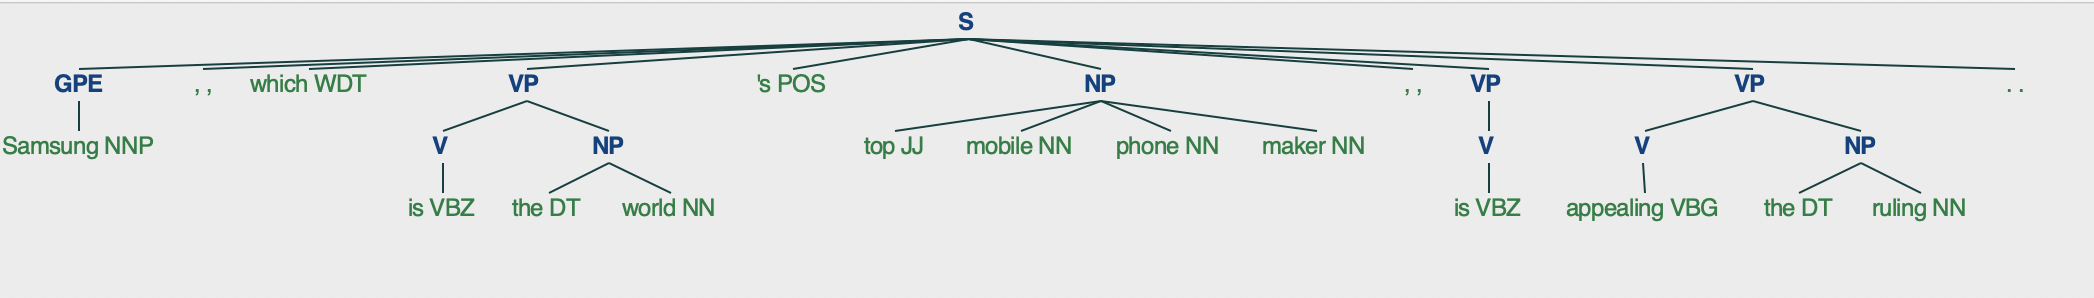

![spacy_tree_structure.svg](spacy_tree_structure.svg)

# End of this notebook